In [1]:
!pip install -U seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4e/11/06958a2b895a3853206dea1fb2a5b11bf044f626f90745987612af9c8f2c/matplotlib-3.1.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
Requirement already up-to-date: numpy>=1.9.3 in ./.local/lib/python3.6/site-packages (from seaborn)
Requirement already up-to-date: pandas>=0.15.2 in ./.local/lib/python3.6/site-packages (from seaborn)
  Using cached https://files.pythonhosted.org/packages/c0/0c/fc2e007d9a992d997f04a80125b0f183da7fb554f1de701bbb70a8e7d479/pyparsing-2.4.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2

In [2]:
# data loading and computing functionality
import pandas as pd
import numpy as np
import scipy as sp

# datasets in sklearn package
from sklearn import datasets
from sklearn.datasets import load_digits

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#PCA, SVD, LDA
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            

In [3]:
#Reading CSV file
airbnb_nyc=pd.read_csv('AB_NYC_2019.csv')

**Data Cleaning**

In [4]:
#Checking for Null Values
airbnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
#Segregating Numeric columns with categorical ones
airbnb_nyc_num=airbnb_nyc._get_numeric_data()
airbnb_nyc_cat=set(airbnb_nyc)-set(airbnb_nyc_num)
print(airbnb_nyc_cat)
print (set(airbnb_nyc_num))

{'name', 'host_name', 'last_review', 'neighbourhood', 'neighbourhood_group', 'room_type'}
{'minimum_nights', 'availability_365', 'reviews_per_month', 'price', 'id', 'host_id', 'longitude', 'number_of_reviews', 'latitude', 'calculated_host_listings_count'}


In [6]:
airbnb_nyc_num.isnull().sum()

id                                    0
host_id                               0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
#Replacing NA values with 0
airbnb_nyc_num.fillna({'reviews_per_month':0},inplace=True)

**Data Analysis(Univariate)**

Distribution of Price using Density Plots in various Neighbourhood_Groups

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


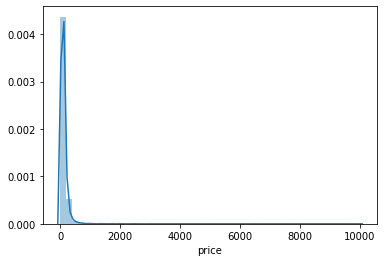

In [41]:
#Brooklyn
sns.distplot(airbnb_nyc[airbnb_nyc.neighbourhood_group=='Brooklyn']['price']);
plt.show()

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


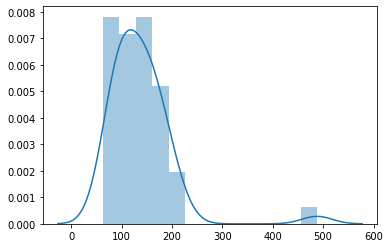

In [38]:
df = airbnb_nyc[airbnb_nyc.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
d = df.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

Brooklyn : Price range is 70-480 based on the neighbourhood.

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


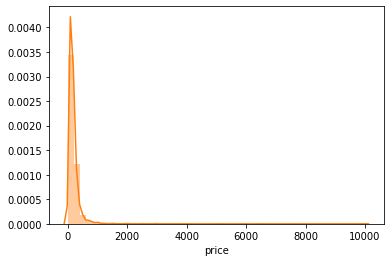

In [44]:
#Manhattan
sns.distplot(airbnb_nyc[airbnb_nyc.neighbourhood_group=='Manhattan']['price'])
plt.show()

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


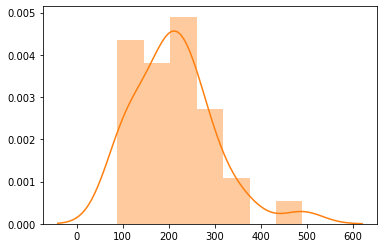

In [48]:
df = airbnb_nyc[airbnb_nyc.neighbourhood_group == "Manhattan"][["neighbourhood","price"]]
d = df.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

Manhattan : Price range is 90-490 based on the neighbourhood.

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


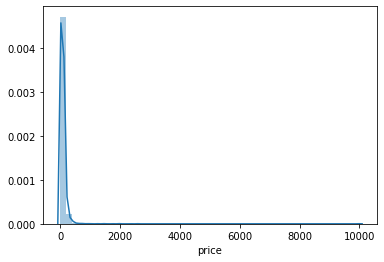

In [49]:
#Queens
sns.distplot(airbnb_nyc[airbnb_nyc.neighbourhood_group=="Queens"]['price'])
plt.show()

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


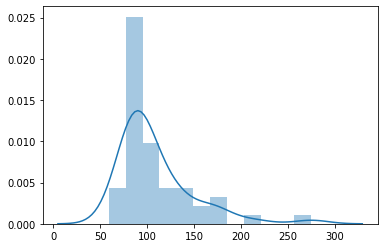

In [53]:
df=airbnb_nyc[airbnb_nyc.neighbourhood_group=="Queens"][['neighbourhood','price']]
d=df.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

Queens : Price range is 60-280 based on neighbourhood

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


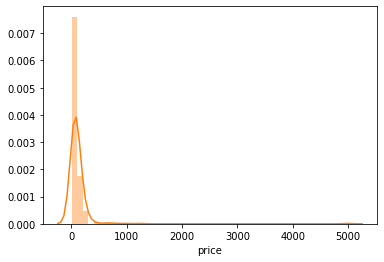

In [55]:
#Staten Island
sns.distplot(airbnb_nyc[airbnb_nyc.neighbourhood_group=="Staten Island"]['price'])
plt.show()

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


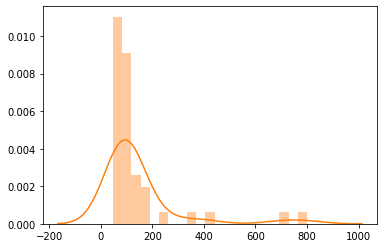

In [59]:
df=airbnb_nyc[airbnb_nyc.neighbourhood_group=="Staten Island"][['neighbourhood','price']]
d=df.groupby('neighbourhood').mean()
sns.distplot(d)
plt.show()                                                   

Staten Island : Price range is 50-800 based on neighbourhood

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


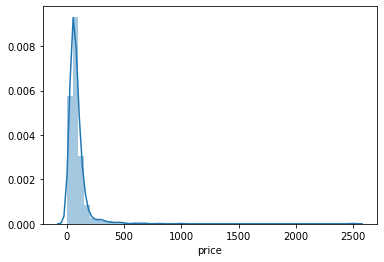

In [60]:
#Bronx
sns.distplot(airbnb_nyc[airbnb_nyc.neighbourhood_group=="Bronx"]['price'])
plt.show()

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


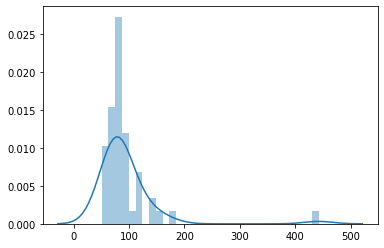

In [61]:
df=airbnb_nyc[airbnb_nyc.neighbourhood_group=="Bronx"][['neighbourhood','price']]
sns.distplot(df.groupby('neighbourhood').mean())
plt.show()

In [ ]:
Bronx : Price range is 50-450

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


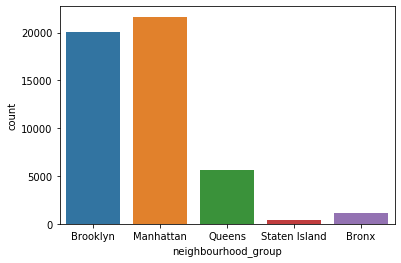

In [62]:
#Count Plot for Neighbourhood group
sns.countplot(airbnb_nyc['neighbourhood_group'])
plt.show()

Mahanttan has highest number of listings and Staten Island has the least

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


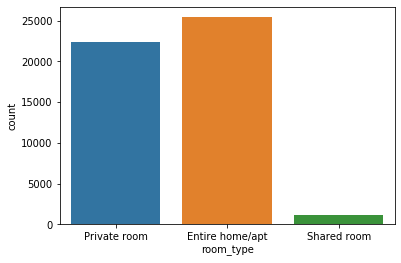

In [63]:
#Count plot for room_types
sns.countplot(airbnb_nyc['room_type'])
plt.show()

Airbnb listings for Entire home/apt are high in number and Shared room are the least.

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


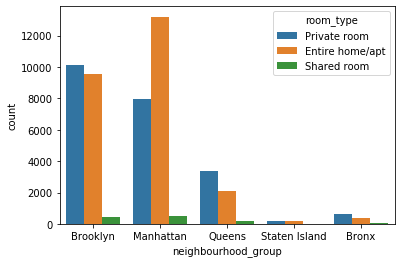

In [9]:
#Count plot for room types in neighbourhood group
sns.countplot(airbnb_nyc['neighbourhood_group'], hue=airbnb_nyc['room_type'])
plt.show()

Manhattan has highest airbnbs with most of them being Entire home/apt.

**Distribution of Price among all the Room_Types**

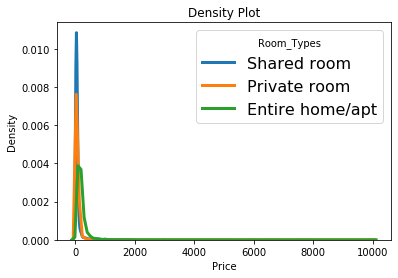

In [72]:
room=['Shared room','Private room','Entire home/apt']
for type in room:
    sns.distplot(airbnb_nyc[airbnb_nyc.room_type==type]['price'],hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                label=type)
plt.title('Density Plot')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()   


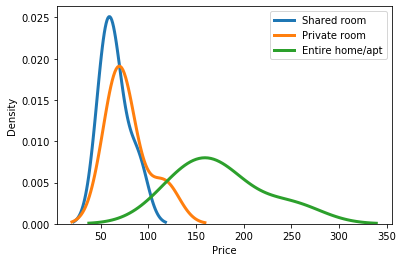

In [111]:
room=['Shared room','Private room','Entire home/apt']
for type in room:
    df=airbnb_nyc[airbnb_nyc.room_type==type][['neighbourhood_group','price']]
    sns.distplot(df.groupby('neighbourhood_group').mean(),hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                label=type)
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()   


Price distribution based on neighbourhood :

1)Shared room : 50-70

2)Private room : 60-120

3)Entire Home/apt : 120-250

**Distribution of Availability**

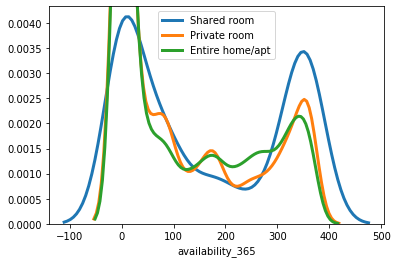

In [94]:
for type in room :
    sns.distplot(airbnb_nyc[airbnb_nyc.room_type==type]['availability_365'],hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                label=type)
plt.show()

Availability varies from 0-360 days

**Minimum Nyt stay in different room_types**

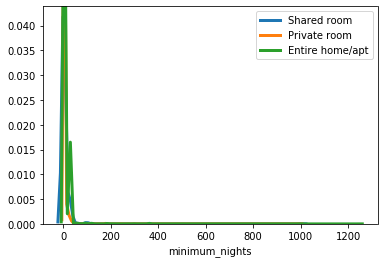

In [114]:
room=['Shared room','Private room','Entire home/apt']
for type in room :
    sns.distplot(airbnb_nyc[airbnb_nyc.room_type==type]['minimum_nights'],hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                label=type)
plt.show()

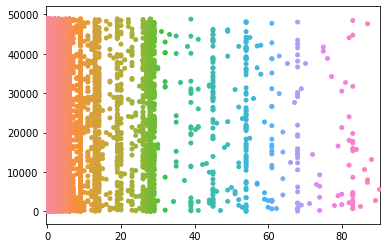

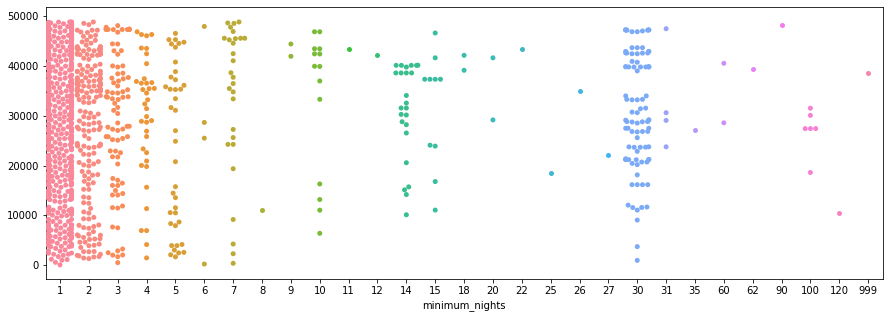

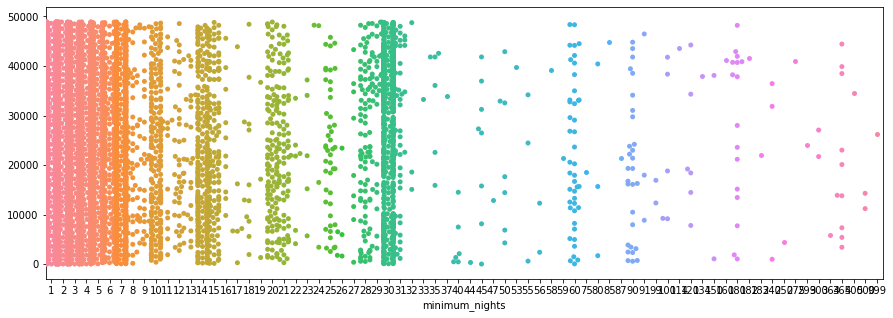

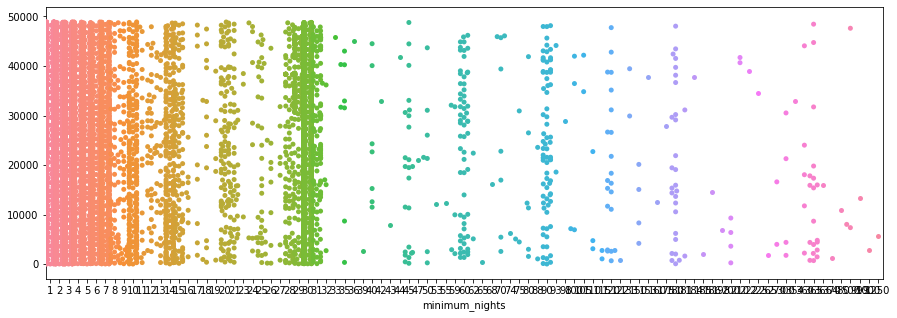

In [120]:
for type in room :
    df = airbnb_nyc[airbnb_nyc.room_type==type]['minimum_nights']
    f,ax = plt.subplots(figsize=(15,5))
    ax = sns.swarmplot(y= df.index,x= df.values)
    plt.xlabel("minimum_nights")
    plt.show()

**Price_Comparision**

***Shared Rooms***

In [10]:
#Brooklyn
airbnb_nyc_B_shared=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Brooklyn')&(airbnb_nyc['room_type']=='Shared room')]
airbnb_nyc_B_shared_price=airbnb_nyc['price'].iloc[airbnb_nyc_B_shared.index]
Brooklyn=airbnb_nyc_B_shared_price.mean()

In [11]:
#Manhattan
airbnb_nyc_Man_shared=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Manhattan')&(airbnb_nyc['room_type']=='Shared room')]
airbnb_nyc_Man_shared_price=airbnb_nyc['price'].iloc[airbnb_nyc_Man_shared.index]
Manhattan=airbnb_nyc_Man_shared_price.mean()

In [12]:
#Queens
airbnb_nyc_Q_shared=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Queens')&(airbnb_nyc['room_type']=='Shared room')]
airbnb_nyc_Q_shared_price=airbnb_nyc['price'].iloc[airbnb_nyc_Q_shared.index]
Queens=airbnb_nyc_Q_shared_price.mean()

In [13]:
#Staten Island
airbnb_nyc_S_shared=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Staten Island')&(airbnb_nyc['room_type']=='Shared room')]
airbnb_nyc_S_shared_price=airbnb_nyc['price'].iloc[airbnb_nyc_S_shared.index]
Staten=airbnb_nyc_S_shared_price.mean()

In [14]:
#Bronx
airbnb_nyc_Bron_shared=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Bronx')&(airbnb_nyc['room_type']=='Shared room')]
airbnb_nyc_Bron_shared_price=airbnb_nyc['price'].iloc[airbnb_nyc_Bron_shared.index]
Bronx=airbnb_nyc_Bron_shared_price.mean()

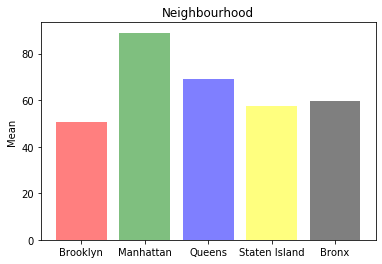

In [15]:
X=airbnb_nyc['neighbourhood_group'].unique().tolist()
Y=[Brooklyn,Manhattan,Queens,Staten,Bronx]
X_pos = np.arange(len(X))
plt.bar(X_pos, Y, align='center', alpha=0.5, color=['Red','Green','Blue','Yellow','Black'])
plt.xticks(X_pos, X)
plt.ylabel('Mean')
plt.title('Neighbourhood')

plt.show()

Avg price of shared room is high in Mahattan and least in Brooklyn

**Private Room**

In [16]:
#Brooklyn
airbnb_nyc_B_private=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Brooklyn')&(airbnb_nyc['room_type']=='Private room')]
airbnb_nyc_B_private_price=airbnb_nyc['price'].iloc[airbnb_nyc_B_private.index]
Brooklyn=airbnb_nyc_B_private_price.mean()

In [17]:
#Manhattan
airbnb_nyc_Man_private=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Manhattan')&(airbnb_nyc['room_type']=='Private room')]
airbnb_nyc_Man_private_price=airbnb_nyc['price'].iloc[airbnb_nyc_Man_private.index]
Manhattan=airbnb_nyc_Man_private_price.mean()

In [18]:
#Queens
airbnb_nyc_Q_private=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Queens')&(airbnb_nyc['room_type']=='Private room')]
airbnb_nyc_Q_private_price=airbnb_nyc['price'].iloc[airbnb_nyc_Q_private.index]
Queens=airbnb_nyc_Q_private_price.mean()

In [19]:
#Staten Island
airbnb_nyc_S_private=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Staten Island')&(airbnb_nyc['room_type']=='Private room')]
airbnb_nyc_S_private_price=airbnb_nyc['price'].iloc[airbnb_nyc_S_private.index]
Staten_Island=airbnb_nyc_S_private_price.mean()

In [20]:
#Bronx
airbnb_nyc_Br_private=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Bronx')&(airbnb_nyc['room_type']=='Private room')]
airbnb_nyc_Br_private_price=airbnb_nyc['price'].iloc[airbnb_nyc_Br_private.index]
Bronx=airbnb_nyc_Br_private_price.mean()

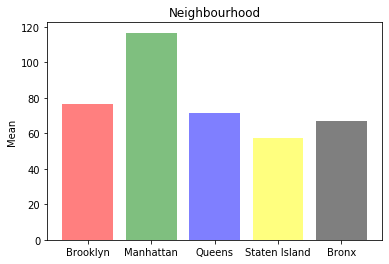

In [21]:
X=airbnb_nyc['neighbourhood_group'].unique().tolist()
Y=[Brooklyn,Manhattan,Queens,Staten,Bronx]
X_pos = np.arange(len(X))
plt.bar(X_pos, Y, align='center', alpha=0.5, color=['Red','Green','Blue','Yellow','Black'])
plt.xticks(X_pos, X)
plt.ylabel('Mean')
plt.title('Neighbourhood')

plt.show()

Avg price of shared room is high in Mahattan and least in Staten Island

**Entire Home/Apt**

In [22]:
#Brooklyn
airbnb_nyc_B_home=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Brooklyn')&(airbnb_nyc['room_type']=='Entire home/apt')]
airbnb_nyc_B_home_price=airbnb_nyc['price'].iloc[airbnb_nyc_B_home.index]
Brooklyn=airbnb_nyc_B_home_price.mean()

In [23]:
#Manhattan
airbnb_nyc_Man_home=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Manhattan')&(airbnb_nyc['room_type']=='Entire home/apt')]
airbnb_nyc_Man_home_price=airbnb_nyc['price'].iloc[airbnb_nyc_Man_home.index]
Manhattan=airbnb_nyc_Man_home_price.mean()

In [24]:
#Queens
airbnb_nyc_Q_home=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Queens')&(airbnb_nyc['room_type']=='Entire home/apt')]
airbnb_nyc_Q_home_price=airbnb_nyc['price'].iloc[airbnb_nyc_Q_home.index]
Queens=airbnb_nyc_Q_home_price.mean()

In [25]:
#Brooklyn
airbnb_nyc_S_home=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Staten Island')&(airbnb_nyc['room_type']=='Entire home/apt')]
airbnb_nyc_S_home_price=airbnb_nyc['price'].iloc[airbnb_nyc_S_home.index]
Staten_Island=airbnb_nyc_S_home_price.mean()

In [26]:
#Brooklyn
airbnb_nyc_Br_home=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group']=='Bronx')&(airbnb_nyc['room_type']=='Entire home/apt')]
airbnb_nyc_Br_home_price=airbnb_nyc['price'].iloc[airbnb_nyc_Br_home.index]
Bronx=airbnb_nyc_Br_home_price.mean()

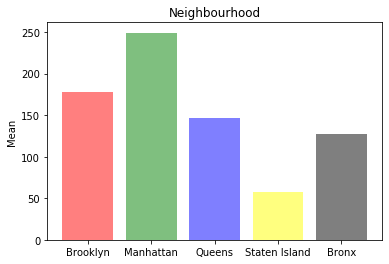

In [27]:
X=airbnb_nyc['neighbourhood_group'].unique().tolist()
Y=[Brooklyn,Manhattan,Queens,Staten,Bronx]
X_pos = np.arange(len(X))
plt.bar(X_pos, Y, align='center', alpha=0.5, color=['Red','Green','Blue','Yellow','Black'])
plt.xticks(X_pos, X)
plt.ylabel('Mean')
plt.title('Neighbourhood')

plt.show()

Avg price of Entire home is high in Mahattan and least in Staten Island

/usr/local/anaconda5/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


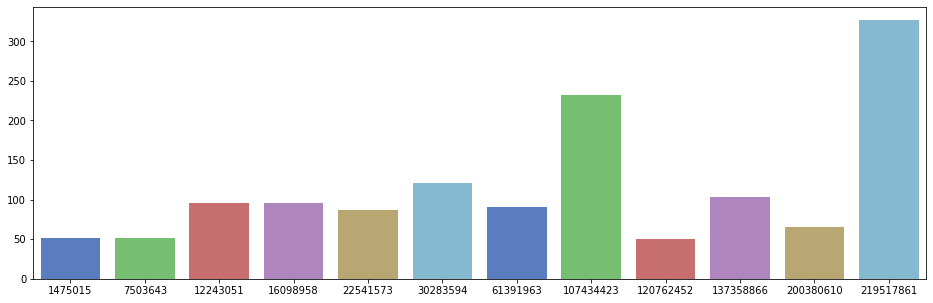

In [33]:
df = airbnb_nyc.host_id.value_counts()[:12]
f,ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(x = df.index,y=df.values,palette="muted")
plt.show()